In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_datareader as web
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# !pip install quandl
# import quandl
# Nasdaq API key = ij6xGCYyHYeKXmzRrpaC

In [4]:
# data = quandl.get("NSE/TATAGLOBAL")
# data = quandl.get('NSE/SBIN',start_date = 20-1-24 , end_date = 20-2-24 , api_key = 'ij6xGCYyHYeKXmzRrpaC')
# data = quandl.get_table("QDL/LME", paginate=True)

In [5]:
!pip install yfinance
import yfinance as yf

In [6]:
data = yf.download('AAPL', start='2014-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [81]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,Open - Close,High - Low
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2014-01-02 00:00:00+00:00,17.253258,19.754642,19.893929,19.715000,19.845715,234684800,0.091072,0.178928
2014-01-03 00:00:00+00:00,16.874279,19.320715,19.775000,19.301071,19.745001,392467600,0.424286,0.473928
2014-01-06 00:00:00+00:00,16.966288,19.426071,19.528570,19.057142,19.194643,412610800,-0.231428,0.471428
2014-01-07 00:00:00+00:00,16.844952,19.287144,19.498571,19.211430,19.440001,317209200,0.152857,0.287142
2014-01-08 00:00:00+00:00,16.951633,19.409286,19.484285,19.238930,19.243214,258529600,-0.166073,0.245356
2014-01-09 00:00:00+00:00,16.735157,19.161428,19.530714,19.119642,19.528570,279148800,0.367142,0.411072
2014-01-10 00:00:00+00:00,16.623493,19.033571,19.314285,18.968214,19.279642,304976000,0.246071,0.346071
2014-01-13 00:00:00+00:00,16.710522,19.133215,19.375000,18.924286,18.925358,378492800,-0.207857,0.450714


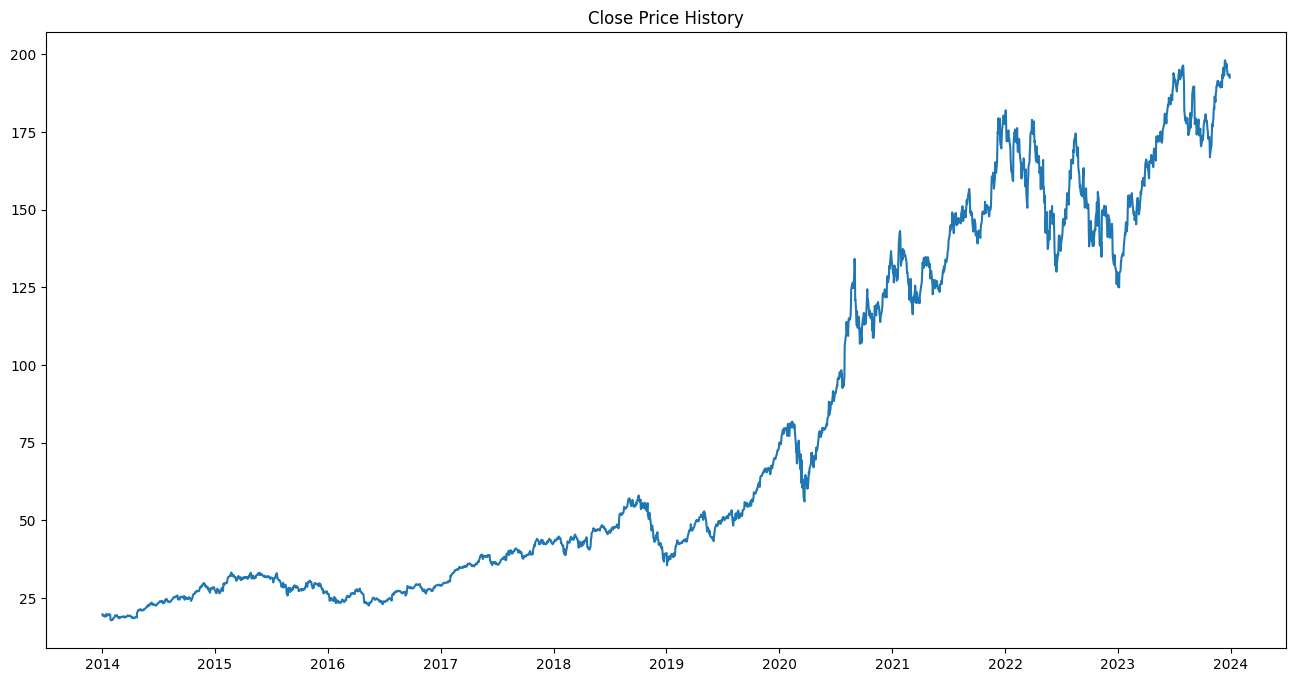

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'], label='Close Price History')

In [9]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [10]:
x = data[['Open - Close','High - Low']]
x.head(10)

Price,Open - Close,High - Low
Ticker,,
Date,,
2014-01-02 00:00:00+00:00,0.091072,0.178928
2014-01-03 00:00:00+00:00,0.424286,0.473928
2014-01-06 00:00:00+00:00,-0.231428,0.471428
2014-01-07 00:00:00+00:00,0.152857,0.287142
2014-01-08 00:00:00+00:00,-0.166073,0.245356
2014-01-09 00:00:00+00:00,0.367142,0.411072
2014-01-10 00:00:00+00:00,0.246071,0.346071
2014-01-13 00:00:00+00:00,-0.207857,0.450714


In [11]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)
y

array([[-1],
       [ 1],
       [-1],
       ...,
       [ 1],
       [-1],
       [-1]])

In [48]:
from sklearn.model_selection import train_test_split
# Ensure y is an array of integers
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 44)

# Reshape y_train and y_test if necessary
y_train = y_train.reshape(-1)  # Ensure y_train is a 1D array
y_test = y_test.reshape(-1)  # Ensure y_test is a 1D array

**Implementation of KNN Classifier**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model and make predictions
model.fit(x_train, y_train)

# accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))
# print('train_data accuracy: %.2f' %accuracy_train)
print('train_data accuracy: {:.2f}'.format(accuracy_train))
print('test_data accuracy: {:.2f}'.format(accuracy_test))

train_data accuracy: 0.61
test_data accuracy: 0.52


In [47]:
prediction_classification = model.predict(x_test)
actual_predicted_data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':prediction_classification})
actual_predicted_data.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,-1
3,1,1
4,1,1
5,-1,-1
6,1,1
7,-1,1
8,1,1
9,-1,1


In [49]:
y = data['Close']
y

Ticker,AAPL
Date,
2014-01-02 00:00:00+00:00,19.754642
2014-01-03 00:00:00+00:00,19.320715
2014-01-06 00:00:00+00:00,19.426071
2014-01-07 00:00:00+00:00,19.287144
2014-01-08 00:00:00+00:00,19.409286
...,...
2023-12-22 00:00:00+00:00,193.600006
2023-12-26 00:00:00+00:00,193.050003
2023-12-27 00:00:00+00:00,193.149994


**Implementation of KNN Regression**

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state = 44)

# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# fit the model and make predictions
model_reg.fit(x_train_reg,y_train_reg)
predictions = model_reg.predict(x_test_reg)

print(predictions)

[[ 39.59616661]
 [ 26.79719048]
 [ 75.87816633]
 [ 58.52833328]
 [149.41983388]
 [ 47.21266645]
 [ 30.8043335 ]
 [152.69933116]
 [152.361999  ]
 [ 29.20740484]
 [145.12783457]
 [ 50.89949977]
 [146.64833374]
 [ 32.13716698]
 [ 26.92176196]
 [ 40.5049998 ]
 [ 32.79150047]
 [ 40.76964315]
 [146.78133392]
 [128.6156662 ]
 [107.2320015 ]
 [132.80633189]
 [ 43.10183322]
 [ 28.06819026]
 [135.01849874]
 [ 25.94745242]
 [ 46.3066672 ]
 [116.73949916]
 [ 35.68833326]
 [ 87.47233264]
 [ 32.62847608]
 [ 29.08969053]
 [ 33.73773842]
 [ 39.74947637]
 [ 43.5178332 ]
 [142.2234993 ]
 [155.52466634]
 [ 29.77347641]
 [139.91883214]
 [ 39.04066696]
 [ 37.08416659]
 [ 30.41080945]
 [ 27.66661898]
 [136.36866786]
 [ 35.25316658]
 [ 38.0421669 ]
 [139.41699982]
 [108.90383453]
 [ 27.87623825]
 [ 29.15538076]
 [136.22600072]
 [137.810333  ]
 [140.65933177]
 [162.37133382]
 [ 28.64190483]
 [116.42666651]
 [145.32000148]
 [ 61.63966688]
 [ 38.33183365]
 [147.86350098]
 [136.70166588]
 [ 29.53485718]
 [ 43.40

In [64]:
#rms
predictions = predictions.reshape(-1)
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

93.1164949925494

In [82]:
y_test_reg = y_test_reg.reshape(-1)  # Reshape without using .values

# Ensure y_test_reg and predictions have the same length
# num_entries = len(y_test_reg)

# Generate dates with the same length
# dates = pd.date_range(start='2014-01-02', periods=num_entries)
valid = pd.DataFrame({
    # 'Date': dates,
    'Actual Close': y_test_reg,
    'Predicted Close': predictions
    })
valid.head(10)

,Actual Close,Predicted Close
0,32.404999,39.596167
1,21.933214,26.797190
2,52.287498,75.878166
3,41.235001,58.528333
4,165.210007,149.419834
5,42.962502,47.212666
6,35.567501,30.804333
7,165.300003,152.699331
8,171.830002,152.361999
9,27.340000,29.207405
